# Intelligent Agents: Reflex-Based Agents for the Vacuum-cleaner World


## Instructions

Total Points: Undergrads 100 / Graduate students 110

Complete this notebook. Use the provided notebook cells and insert additional code and markdown cells as needed. Submit the completely rendered notebook as a PDF file. 

## Introduction

In this assignment you will implement a simulator environment for an automatic vacuum cleaner robot, a set of different reflex-based agent programs, and perform a comparison study for cleaning a single room. Focus on the __cleaning phase__ which starts when the robot is activated and ends when the last dirty square in the room has been cleaned. Someone else will take care of the agent program needed to navigate back to the charging station after the room is clean.

## PEAS description of the cleaning phase

__Performance Measure:__ Each action costs 1 energy unit. The performance is measured as the sum of the energy units used to clean the whole room.

__Environment:__ A room with $n \times n$ squares where $n = 5$. Dirt is randomly placed on each square with probability $p = 0.2$. For simplicity, you can assume that the agent knows the size and the layout of the room (i.e., it knows $n$). To start, the agent is placed on a random square.

__Actuators:__ The agent can clean the current square (action `suck`) or move to an adjacent square by going `north`, `east`, `south`, or `west`.

__Sensors:__ Four bumper sensors, one for north, east, south, and west; a dirt sensor reporting dirt in the current square.  


## The agent program for a simple randomized agent

The agent program is a function that gets sensor information (the current percepts) as the arguments. The arguments are:

* A dictionary with boolean entries for the for bumper sensors `north`, `east`, `west`, `south`. E.g., if the agent is on the north-west corner, `bumpers` will be `{"north" : True, "east" : False, "south" : False, "west" : True}`.
* The dirt sensor produces a boolean.

The agent returns the chosen action as a string.

Here is an example implementation for the agent program of a simple randomized agent:  

In [1]:
import numpy as np

actions = ["north", "east", "west", "south", "suck"]

def simple_randomized_agent(bumpers, dirty, verbose = True):
    return np.random.choice(actions)

In [2]:
# define percepts (current location is NW corner and it is dirty)
bumpers = {"north" : True, "east" : False, "south" : False, "west" : True}
dirty = True

# call agent program function with percepts and it returns an action
simple_randomized_agent(bumpers, dirty, False)

'south'

__Note:__ This is not a rational intelligent agent. It ignores its sensors and may bump into a wall repeatedly or not clean a dirty square. You will be asked to implement rational agents below.

## Simple environment example

We implement a simple simulation environment that supplies the agent with its percepts.
The simple environment is infinite in size (bumpers are always `False`) and every square is always dirty, even if the agent cleans it. The environment function returns a performance measure which is here the number of cleaned squares (since the room is infinite and all squares are constantly dirty, the agent can never clean the whole room as required in the PEAS description above). The energy budget of the agent is specified as `max_steps`. 

In [3]:
def simple_environment(agent, max_steps, verbose = True):
    num_cleaned = 0
    
    for i in range(max_steps):
        dirty = True
        bumpers = {"north" : False, "south" : False, "west" : False, "east" : False}

        action = agent(bumpers, dirty, True)
        if (verbose): print("step", i , "- action:", action) 
        
        if (action == "suck"): 
            num_cleaned = num_cleaned + 1
        
    return num_cleaned
        


Do one simulation run with a simple randomized agent that has enough energy for 20 steps.

In [4]:
simple_environment(simple_randomized_agent, max_steps = 20, verbose = True)

step 0 - action: south
step 1 - action: south
step 2 - action: south
step 3 - action: south
step 4 - action: east
step 5 - action: suck
step 6 - action: east
step 7 - action: north
step 8 - action: south
step 9 - action: south
step 10 - action: north
step 11 - action: suck
step 12 - action: south
step 13 - action: west
step 14 - action: north
step 15 - action: north
step 16 - action: suck
step 17 - action: east
step 18 - action: south
step 19 - action: west


3

# Tasks

## General [10 Points]

1. Make sure that you use the latest version of this notebook. Sync your forked repository and pull the latest revision. 
2. Your implementation can use libraries like math, numpy, scipy, but not libraries that implement inteligent agents or complete search algorithms. Try to keep the code simple! In this course, we want to learn about the algorithms and we often do not need to use object-oriented design.
3. You notebook needs to be formated professionally. 
    - Add additional markdown blocks for your description, comments in the code, add tables and use mathplotlib to produce charts where appropriate
    - Do not show debugging output or include an excessive amount of output.
    - Check that your PDF file is readable. For example, long lines are cut off in the PDF file. You don't have control over page breaks, so do not worry about these.
4. Document your code. Add a short discussion of how your implementation works and your design choices.


## Task 1: Implement a simulation environment [20 Points]

The simple environment above is not very realistic. Your environment simulator needs to follow the PEAS description from above. It needs to:

* Initialize the environment by storing the state of each square (clean/dirty) and making some dirty. ([Help with random numbers and arrays in Python](https://github.com/mhahsler/CS7320-AI/blob/master/Python_Code_Examples/random_numbers_and_arrays.ipynb))
* Keep track of the agent's position.
* Call the agent function repeatedly and provide the agent function with the sensor inputs.  
* React to the agent's actions. E.g, by removing dirt from a square or moving the agent around unless there is a wall in the way.
* Keep track of the performance measure. That is, track the agent's actions until all dirty squares are clean and count the number of actions it takes the agent to complete the task.

The easiest implementation for the environment is to hold an 2-dimensional array to represent if squares are clean or dirty and to call the agent function in a loop until all squares are clean or a predefined number of steps have been reached (i.e., the robot runs out of energy).

The simulation environment should be a function like the `simple_environment()` and needs to work with the simple randomized agent program from above. **Use the same environmnt for all your agent implementations in the tasks below.**

*Note on debugging:* Debugging is difficult. Make sure your environment prints enough information when you use `verbose = True`. Also, implementing a function that the environment can use to displays the room with dirt and the current position of the robot at every step is very useful.  

## Bumper Sensors

The bumper sensors identify whether the vacuum has a reached a wall or a corner based on its location. The default value is set as false and is returned unless if the bumpers are activated by a specific location.

I made these sensors a separate function that returns the bumpers to the simulation environment when called.
    
    
__**Worth noting:** Bumpers that are strictly one direction (i.e. just north) mean that the vacuum hit a wall but not a corner.__

In [5]:
def bumper_sensors(nx, ny, position_x, position_y, verbose = True):
    
    bumpers = {"north": False, "south": False, "west": False, "east": False}
    
    # If East
    if(position_x == nx-1):
        # If Northeast
        if(position_y == 0):
            return {"north" : True, "south" : False, "west" : False, "east" : True}
        
        # If Southeast
        elif(position_y == ny-1):
            return {"north" : False, "south" : True, "west" : False, "east" : True}
        
        # If Only East
        else:
            return {"north" : False, "south" : False, "west" : False, "east" : True}
    
    # If West
    elif(position_x == 0):
        if(position_y == 0):
            return {"north" : True, "south" : False, "west" : True, "east" : False}
        elif(position_y == ny-1):
            return {"north" : False, "south" : True, "west" : True, "east" : False}
        else:
            return{ "north" : False, "south" : False, "west" : True, "east" : False}
    
    # If only North or only South
    if(position_y == 0):
        return {"north" : True, "south" : False, "west" : False, "east" : False}
    elif(position_y == ny-1):
        return{"north" : False, "south" : True, "west" : False, "east" : False}

    return bumpers

## Simulation Environment

To summarize the simulation environment I created, it essentially creates the environment with nxn number of squares. It generates a random starting position for the agent used and also assigns a random assortment of squares as either clean or dirty (clean = True, dirty = False). From there, it reacts to the actions outputted by the agent by either cleaning, staying if the square is already clean, or moving to the next square in the direction the agent indicates.

This simulation environment runs until the entire room is clean.


### The Simulation Environment I created keeps track of the following things:
1. Number of dirty squares
2. Starting position of vacuum
3. Bumper sensors
4. Dirt sensors
5. Total number of squares cleaned 
6. **Performance Measure:** Total number of actions (1 action = 1 energy unit)Total number of squares cleaned 

In [6]:
# Your code and description goes here
def simulation_environment(agent, nx, ny, verbose = True): 
    num_cleaned = 0 # Keeping track of swaures cleaned
    num_actions_total = 0
    rng = np.random.default_rng() # create random number generator
    p = 0.2 # use given probability from instructions
    squares = [[rng.random() < p for x in range(nx)] for y in range(ny)] # intitalize squares array w/ clean and dirty squares
    count_dirty = np.count_nonzero(squares) # count number of dirty squares
    print("Number of dirty squares:")
    print(count_dirty)
    
    # Print the squares. True = Dirty, False = Clean
    print("Before: ")
    for x in squares:
        print(x)
    
    # Randomly generate starting position of vacuum
    position_x = rng.integers(low = 0, high = nx-1)
    position_y = rng.integers(low = 0, high = ny-1)
    
    # Get dirt status of starting position
    dirty = squares[position_x][position_y]
    
    # Receive bumper information based on starting position
    bumpers = bumper_sensors(nx, ny, position_x, position_y)
    print("\n",bumpers, "\n")
    
    # Keep running until there are no more dirty squares
    while(count_dirty > 0):
        action = agent(bumpers, dirty, verbose) # Action is the one returned by agent
        
        # Check to see if action is to suck and whether the square is dirty
        if (action == "suck" and squares[position_x][position_y] == True):
            squares[position_x][position_y] = False
            dirty = False
            num_cleaned = num_cleaned + 1
            count_dirty = np.count_nonzero(squares)
        
        #If the square is already dirty, don't do anything to it. Return that it's already clean
        elif (action == "suck" and squares[position_x][position_y] == False):
            action = "already clean - stay in position"
        
        # If the action is to move in a specific direction, move in that direction and reset if it
        # attempts to go outside the bounds
        elif(action == "west"): # West = 0
            position_x -= 1
            if(position_x < 0):
                if(verbose): print("Environment: Attempted to move beyond wall. Blocked.")
                position_x = 0
            
        elif(action == "east"): # East = nx-1
            position_x += 1
            if(position_x > nx-1):
                if(verbose): print("Environment: Attempted to move beyond wall. Blocked.")
                position_x = nx-1
            

        elif(action == "north"): # North = 0
            position_y -= 1
            if(position_y < 0):
                if(verbose): print("Environment: Attempted to move beyond wall. Blocked.")
                position_y = 0
                
        elif(action == "south"): # South = ny-1
            position_y += 1
            if(position_y > ny-1):
                if(verbose): print("Environment: Attempted to move beyond wall. Blocked.")
                position_y = ny-1
        
        # Print environment steps 
        if (verbose): print("Environment: Step", num_actions_total , "- action:", action, " position before action: (", position_x, ",", position_y, ")")
        
        num_actions_total += 1
        dirty = squares[position_x][position_y]
        bumpers = bumper_sensors(nx, ny, position_x, position_y)
        count_dirty = np.count_nonzero(squares)
    
    # Print the total number of actions and then the squares layout
    print("\nTotal number of actions: ", num_actions_total, "\n")
    print("After: ")
    for x in squares:
        print(x)

    print("Final Position - (", position_x, ",", position_y, ")")
    print("Number of squares cleaned: ", num_cleaned)    
    return num_actions_total
        
    


### The Verbose Output

In [7]:
simulation_environment(simple_randomized_agent, 5, 5, True)

Number of dirty squares:
8
Before: 
[False, False, True, False, False]
[True, False, False, True, False]
[True, True, False, False, False]
[True, False, True, True, False]
[False, False, False, False, False]

 {'north': False, 'south': False, 'west': True, 'east': False} 

Environment: Step 0 - action: already clean - stay in position  position before action: ( 0 , 3 )
Environment: Step 1 - action: south  position before action: ( 0 , 4 )
Environment: Attempted to move beyond wall. Blocked.
Environment: Step 2 - action: south  position before action: ( 0 , 4 )
Environment: Attempted to move beyond wall. Blocked.
Environment: Step 3 - action: south  position before action: ( 0 , 4 )
Environment: Attempted to move beyond wall. Blocked.
Environment: Step 4 - action: south  position before action: ( 0 , 4 )
Environment: Step 5 - action: east  position before action: ( 1 , 4 )
Environment: Step 6 - action: already clean - stay in position  position before action: ( 1 , 4 )
Environment: Step

Environment: Step 146 - action: north  position before action: ( 0 , 0 )
Environment: Attempted to move beyond wall. Blocked.
Environment: Step 147 - action: north  position before action: ( 0 , 0 )
Environment: Step 148 - action: south  position before action: ( 0 , 1 )
Environment: Step 149 - action: south  position before action: ( 0 , 2 )
Environment: Step 150 - action: suck  position before action: ( 0 , 2 )
Environment: Step 151 - action: south  position before action: ( 0 , 3 )
Environment: Step 152 - action: north  position before action: ( 0 , 2 )
Environment: Step 153 - action: east  position before action: ( 1 , 2 )
Environment: Step 154 - action: west  position before action: ( 0 , 2 )
Environment: Attempted to move beyond wall. Blocked.
Environment: Step 155 - action: west  position before action: ( 0 , 2 )
Environment: Attempted to move beyond wall. Blocked.
Environment: Step 156 - action: west  position before action: ( 0 , 2 )
Environment: Step 157 - action: east  posit

Environment: Step 256 - action: already clean - stay in position  position before action: ( 4 , 3 )
Environment: Step 257 - action: north  position before action: ( 4 , 2 )
Environment: Step 258 - action: already clean - stay in position  position before action: ( 4 , 2 )
Environment: Step 259 - action: north  position before action: ( 4 , 1 )
Environment: Step 260 - action: west  position before action: ( 3 , 1 )
Environment: Step 261 - action: east  position before action: ( 4 , 1 )
Environment: Step 262 - action: north  position before action: ( 4 , 0 )
Environment: Step 263 - action: south  position before action: ( 4 , 1 )
Environment: Attempted to move beyond wall. Blocked.
Environment: Step 264 - action: east  position before action: ( 4 , 1 )
Environment: Step 265 - action: already clean - stay in position  position before action: ( 4 , 1 )
Environment: Attempted to move beyond wall. Blocked.
Environment: Step 266 - action: east  position before action: ( 4 , 1 )
Environment: S

Environment: Step 365 - action: west  position before action: ( 1 , 0 )
Environment: Step 366 - action: suck  position before action: ( 1 , 0 )
Environment: Step 367 - action: west  position before action: ( 0 , 0 )
Environment: Step 368 - action: already clean - stay in position  position before action: ( 0 , 0 )
Environment: Step 369 - action: south  position before action: ( 0 , 1 )
Environment: Step 370 - action: east  position before action: ( 1 , 1 )
Environment: Step 371 - action: north  position before action: ( 1 , 0 )
Environment: Step 372 - action: west  position before action: ( 0 , 0 )
Environment: Attempted to move beyond wall. Blocked.
Environment: Step 373 - action: west  position before action: ( 0 , 0 )
Environment: Attempted to move beyond wall. Blocked.
Environment: Step 374 - action: west  position before action: ( 0 , 0 )
Environment: Attempted to move beyond wall. Blocked.
Environment: Step 375 - action: north  position before action: ( 0 , 0 )
Environment: Attem

Environment: Step 474 - action: west  position before action: ( 3 , 0 )
Environment: Attempted to move beyond wall. Blocked.
Environment: Step 475 - action: north  position before action: ( 3 , 0 )
Environment: Step 476 - action: west  position before action: ( 2 , 0 )
Environment: Step 477 - action: already clean - stay in position  position before action: ( 2 , 0 )
Environment: Attempted to move beyond wall. Blocked.
Environment: Step 478 - action: north  position before action: ( 2 , 0 )
Environment: Step 479 - action: already clean - stay in position  position before action: ( 2 , 0 )
Environment: Step 480 - action: east  position before action: ( 3 , 0 )
Environment: Step 481 - action: already clean - stay in position  position before action: ( 3 , 0 )
Environment: Step 482 - action: already clean - stay in position  position before action: ( 3 , 0 )
Environment: Step 483 - action: west  position before action: ( 2 , 0 )
Environment: Step 484 - action: south  position before actio

Environment: Step 583 - action: north  position before action: ( 2 , 3 )
Environment: Step 584 - action: east  position before action: ( 3 , 3 )
Environment: Step 585 - action: already clean - stay in position  position before action: ( 3 , 3 )
Environment: Step 586 - action: already clean - stay in position  position before action: ( 3 , 3 )
Environment: Step 587 - action: west  position before action: ( 2 , 3 )
Environment: Step 588 - action: already clean - stay in position  position before action: ( 2 , 3 )
Environment: Step 589 - action: south  position before action: ( 2 , 4 )
Environment: Step 590 - action: already clean - stay in position  position before action: ( 2 , 4 )
Environment: Attempted to move beyond wall. Blocked.
Environment: Step 591 - action: south  position before action: ( 2 , 4 )
Environment: Step 592 - action: already clean - stay in position  position before action: ( 2 , 4 )
Environment: Step 593 - action: north  position before action: ( 2 , 3 )
Environment

618

## Task 2:  Implement a simple reflex agent [10 Points] 

The simple reflex agent randomly walks around but reacts to the bumper sensor by not bumping into the wall and to dirt with sucking. Implement the agent program as a function.

_Note:_ Agents cannot directly use variable in the environment. They only gets the percepts as the arguments to the agent function.

### Simple Reflex Agent

The Simple Reflex Agent simply cleans if it finds a dirty square and randomly moves around the room otherwise. It already avoids walls, so it does not require that additional logic.

As you can see, the simple reflex agent only reacts to its bumper and dirt sensors.

In [8]:
def simple_reflex_agent(bumpers, dirty, verbose):
    # If the square is dirty, immediately return suck
    if(dirty == True):
        if(verbose): print("\tAgent: Found a dirty square... GROSS... Cleaning now")
        return "suck" # return suck

    # Otherwise, return a random directional action
    if(verbose): print("\tAgent: Moving randomly until dirt is found or wall is found!")
    return np.random.choice(["north", "south", "east", "west"])

### The Verbose Output

In [9]:
simulation_environment(simple_reflex_agent, 5, 5, True)

Number of dirty squares:
7
Before: 
[True, False, True, False, False]
[True, False, False, True, False]
[False, True, False, False, False]
[False, False, False, False, True]
[False, False, False, False, True]

 {'north': True, 'south': False, 'west': False, 'east': False} 

	Agent: Found a dirty square... GROSS... Cleaning now
Environment: Step 0 - action: suck  position before action: ( 1 , 0 )
	Agent: Moving randomly until dirt is found or wall is found!
Environment: Step 1 - action: east  position before action: ( 2 , 0 )
	Agent: Moving randomly until dirt is found or wall is found!
Environment: Step 2 - action: west  position before action: ( 1 , 0 )
	Agent: Moving randomly until dirt is found or wall is found!
Environment: Step 3 - action: east  position before action: ( 2 , 0 )
	Agent: Moving randomly until dirt is found or wall is found!
Environment: Attempted to move beyond wall. Blocked.
Environment: Step 4 - action: north  position before action: ( 2 , 0 )
	Agent: Moving rand

Environment: Step 63 - action: suck  position before action: ( 4 , 4 )
	Agent: Moving randomly until dirt is found or wall is found!
Environment: Attempted to move beyond wall. Blocked.
Environment: Step 64 - action: east  position before action: ( 4 , 4 )
	Agent: Moving randomly until dirt is found or wall is found!
Environment: Step 65 - action: west  position before action: ( 3 , 4 )
	Agent: Moving randomly until dirt is found or wall is found!
Environment: Step 66 - action: north  position before action: ( 3 , 3 )
	Agent: Moving randomly until dirt is found or wall is found!
Environment: Step 67 - action: east  position before action: ( 4 , 3 )
	Agent: Moving randomly until dirt is found or wall is found!
Environment: Step 68 - action: west  position before action: ( 3 , 3 )
	Agent: Moving randomly until dirt is found or wall is found!
Environment: Step 69 - action: west  position before action: ( 2 , 3 )
	Agent: Moving randomly until dirt is found or wall is found!
Environment: St

75

## Task 3: Implement a model-based reflex agent [20 Points]

Model-based agents use a state to keep track of what they have done and perceived so far. Your agent needs to find out where it is located and then keep track of its current location. You also need a set of rules based on the state and the percepts to make sure that the agent will clean the whole room. For example, the agent can move to a corner to determine its location and then it can navigate through the whole room and clean dirty squares.

Describe how you define the __agent state__ and how your agent works before implementing it. ([Help with implementing state information on Python](https://github.com/mhahsler/CS7320-AI/blob/master/Python_Code_Examples/store_agent_state_information.ipynb))

### Model-Based Reflex Agent

I had initially done some research on how the agents in Roombas work, and I found that they first do a wall-following pattern and then randomly move around the room. I initially implemented this, but found the logic to be highly convuluted and it became a giant block of code. I decided to switch my approach to one where this agent cleans in a snake formation throughout the entire time. It essentially goes to the northwest corner and immediately starts going from wall to wall while also moving down by one square each time until the room is completely clean.

This agent keeps track of different phases:
- **Phase One:** Where the agent has reached the northwest corner and is ready to clean
- **Phase Two:** Where the agent begins cleaning and moving in snake formation around the room


In [10]:
# Declare set of global variables (need to be reset later)
phase_one = False
cleaned = []
row = -1
col = -1
direction = "east"

def Model_Based_Reflex(bumpers, dirty, verbose):
    global phase_one
    global direction
    global clean
    global row
    global col

    # Check if phase one is complete, if it isn't, then check if it reached the NW corner
    if(phase_one == False):
        if(bumpers.get("north") == True and bumpers.get("west") == True):
            phase_one = True
            print("\tAgent: Position 0 Reached! Phase One Complete. Will now begin Phase 2: Cleaning.")
            row = 0 # Set the row and column as 0 so the agent knows where it is
            col = 0
            
            # As usual... if dirty, clean it
            if(dirty):
                print("\tAgent: Found a dirty square... GROSS... Cleaning now")
                return "suck"
            else: 
                print("\tAgent: Moving to next corner!")
                return "east"
        # If it hasn't reached the corner, then the agent will move to the NW corner by moving north, then west
        if(bumpers.get("north") == False):
            print("\tAgent: Moving to Position 0 (Northwest Corner)\n\tMoving...")
            return "north"
        elif(bumpers.get("west") == False):
            print("\tAgent: Moving to Position 0 (Northwest Corner)\n\tMoving...")
            return "west"

    else:
        # Phase one is now complete, so clean as usual or focus on moving to the next wall/down
        if(dirty):
            if(verbose): print("\tAgent: Found a dirty square... GROSS... Cleaning now")
            cleaned.append([row, col])
            return "suck"
        else:
            if(not(bumpers.get(direction))):
                if(direction == "east"):
                    if(verbose): print("\tAgent: Moving to east wall")
                    col += 1
                else:
                    if(verbose): print("\tAgent: Moving to west wall")
                    col -= 1
                return direction
            else:
                if(direction == "east"):
                    if(verbose): print("\tAgent: Wall reached! Moving south and continuing west.")
                    direction = "west"
                else:
                    if(verbose): print("\tAgent: Wall reached! Moving south and continuing east.")
                    direction = "east"
                row += 1
                return "south"
        # Not used for anything in particular, but the roomba is moving!
        moving = True

In [11]:
simulation_environment(Model_Based_Reflex, 5, 5, False)

Number of dirty squares:
0
Before: 
[False, False, False, False, False]
[False, False, False, False, False]
[False, False, False, False, False]
[False, False, False, False, False]
[False, False, False, False, False]

 {'north': True, 'south': False, 'west': False, 'east': False} 


Total number of actions:  0 

After: 
[False, False, False, False, False]
[False, False, False, False, False]
[False, False, False, False, False]
[False, False, False, False, False]
[False, False, False, False, False]
Final Position - ( 2 , 0 )
Number of squares cleaned:  0


0

In [12]:
# Resetting the global variables 

phase_one = False
cleaned = []
row = -1
col = -1
direction = "east"

## Task 4: Simulation study [30 Points]

Compare the performance (the performance measure is defined in the PEAS description above) of the agents using  environments of different size. E.g., $5 \times 5$, $10 \times 10$ and
$100 \times 100$. Use 100 random runs for each. Present the results using tables and graphs. Discuss the differences between the agents. 
([Help with charts and tables in Python](https://github.com/mhahsler/CS7320-AI/blob/master/Python_Code_Examples/charts_and_tables.ipynb))

### Comments on the Simulation Study

For the simulation study, I made the decision to use a size 50x50 instead of 100 because my computer could not handle running for so long (Jupyter Notebook would crash and I was trying to run it for over a day).

How I approached the simulation study is I created lists for each agent and aggregated the lists with their random environment size and outputted performance measure. From there, I plotted the performance measure and their averages to compare how they performed.

In [13]:
# Declare the environment sizes.
environment_sizes = [5, 10, 50]

# Create lists for the different agents
simple_random = []
simple_reflex = []
model_reflex = []

# For loop through each agent's non-verbose output.
print("\nCurrent Agent - Simple Randomized")
for x in range(100):
    n = np.random.choice(environment_sizes)
    print("Random Environment Size: ", n)
    simple_random.append([n, simulation_environment(simple_randomized_agent, n, n, False)])
    print("\n**************************************************\n")
    



Current Agent - Simple Randomized
Random Environment Size:  5
Number of dirty squares:
4
Before: 
[False, False, False, False, True]
[False, False, False, False, False]
[False, True, False, False, False]
[False, True, False, False, False]
[False, False, False, True, False]

 {'north': False, 'south': False, 'west': False, 'east': False} 


Total number of actions:  282 

After: 
[False, False, False, False, False]
[False, False, False, False, False]
[False, False, False, False, False]
[False, False, False, False, False]
[False, False, False, False, False]
Final Position - ( 3 , 1 )
Number of squares cleaned:  4

**************************************************

Random Environment Size:  5
Number of dirty squares:
10
Before: 
[False, True, False, True, False]
[True, True, True, False, False]
[False, False, True, False, False]
[False, True, False, False, False]
[True, False, True, False, True]

 {'north': False, 'south': False, 'west': False, 'east': False} 


Total number of actions:


Total number of actions:  189095 

After: 
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, F


Total number of actions:  251966 

After: 
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, F


Total number of actions:  170561 

After: 
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, F

Total number of actions:  4464 

After: 
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
Final Position - ( 0 , 4 )
Number of squares cleaned:  25

**************************************************

Random Environment Size:  5
Number of dirty squares:
5
Before: 
[False, False, False, False, True]
[False, False, False, False, True]
[Fal


Total number of actions:  233701 

After: 
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, F


Total number of actions:  134200 

After: 
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, F


Total number of actions:  149090 

After: 
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, F


Total number of actions:  169580 

After: 
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, F


Total number of actions:  142508 

After: 
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, F


Total number of actions:  435 

After: 
[False, False, False, False, False]
[False, False, False, False, False]
[False, False, False, False, False]
[False, False, False, False, False]
[False, False, False, False, False]
Final Position - ( 3 , 0 )
Number of squares cleaned:  4

**************************************************

Random Environment Size:  50
Number of dirty squares:
498
Before: 
[True, False, False, False, False, True, False, False, True, False, False, False, True, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, True, True, False, True, False, False, True, False, False, False, True, False, False, False, True]
[False, False, False, False, False, True, False, True, False, False, False, False, False, False, False, False, True, False, False, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, F


Total number of actions:  148601 

After: 
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, F


Total number of actions:  123550 

After: 
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, F


Total number of actions:  170819 

After: 
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, F


Total number of actions:  144947 

After: 
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, F


Total number of actions:  215574 

After: 
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, F


Total number of actions:  161071 

After: 
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, F


Total number of actions:  183343 

After: 
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, F


Total number of actions:  117905 

After: 
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, F


Total number of actions:  118751 

After: 
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, F


Total number of actions:  146755 

After: 
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, F


Total number of actions:  158381 

After: 
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, F

Total number of actions:  2063 

After: 
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
Final Position - ( 1 , 7 )
Number of squares cleaned:  22

**************************************************

Random Environment Size:  50
Number of dirty squares:
513
Before: 
[False, False, False, True, False, True, True, False, True, False, Fals


Total number of actions:  231434 

After: 
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, F

Total number of actions:  287 

After: 
[False, False, False, False, False]
[False, False, False, False, False]
[False, False, False, False, False]
[False, False, False, False, False]
[False, False, False, False, False]
Final Position - ( 3 , 4 )
Number of squares cleaned:  6

**************************************************

Random Environment Size:  50
Number of dirty squares:
467
Before: 
[False, False, True, True, False, False, True, False, True, False, False, False, True, True, False, False, False, True, False, False, False, False, True, False, False, False, True, False, False, False, False, False, False, False, False, True, True, False, True, False, False, False, False, False, False, False, False, False, True, False]
[True, False, False, False, False, False, False, True, False, False, False, False, False, False, True, False, True, True, True, False, False, False, False, False, True, False, False, False, True, False, False, False, False, True, False, False, False, False, False, 


Total number of actions:  145890 

After: 
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, F


Total number of actions:  133891 

After: 
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, F


Total number of actions:  292253 

After: 
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, F


Total number of actions:  151514 

After: 
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, F

Total number of actions:  4846 

After: 
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
Final Position - ( 5 , 2 )
Number of squares cleaned:  14

**************************************************

Random Environment Size:  10
Number of dirty squares:
27
Before: 
[False, False, False, False, False, False, False, False, False, True]
[F


Total number of actions:  191589 

After: 
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, F


Total number of actions:  163460 

After: 
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, F


Total number of actions:  163496 

After: 
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, F


Total number of actions:  134697 

After: 
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, F


Total number of actions:  199158 

After: 
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, F


Total number of actions:  287312 

After: 
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, F


Total number of actions:  2815 

After: 
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
Final Position - ( 1 , 4 )
Number of squares cleaned:  22

**************************************************

Random Environment Size:  50
Number of dirty squares:
477
Before: 
[False, True, False, False, False, False, False, False, True, True, Tr


Total number of actions:  174095 

After: 
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, F


Total number of actions:  129702 

After: 
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, F


Total number of actions:  139356 

After: 
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, F


Total number of actions:  133923 

After: 
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, F


Total number of actions:  120237 

After: 
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, F


Total number of actions:  146107 

After: 
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, F


Total number of actions:  204704 

After: 
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, F


Total number of actions:  188627 

After: 
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, F

In [14]:
# Simple Reflex Agent 
print("\nCurrent Agent - Simple Reflez")
for x in range(100):
    n = np.random.choice(environment_sizes)
    print("Random Environment Size: ", n)
    simple_reflex.append([n, simulation_environment(simple_reflex_agent, n, n, False)])
    print("\n**************************************************\n")


Current Agent - Simple Reflez
Random Environment Size:  5
Number of dirty squares:
3
Before: 
[False, False, True, False, False]
[False, False, False, False, True]
[False, False, False, False, False]
[False, False, True, False, False]
[False, False, False, False, False]

 {'north': False, 'south': False, 'west': False, 'east': False} 


Total number of actions:  51 

After: 
[False, False, False, False, False]
[False, False, False, False, False]
[False, False, False, False, False]
[False, False, False, False, False]
[False, False, False, False, False]
Final Position - ( 0 , 2 )
Number of squares cleaned:  3

**************************************************

Random Environment Size:  5
Number of dirty squares:
1
Before: 
[False, False, False, False, False]
[False, False, False, False, False]
[False, False, False, False, False]
[False, False, False, False, False]
[False, False, True, False, False]

 {'north': False, 'south': False, 'west': True, 'east': False} 


Total number of actio


Total number of actions:  52121 

After: 
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, Fa


Total number of actions:  60242 

After: 
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, Fa


Total number of actions:  125963 

After: 
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, F


Total number of actions:  64867 

After: 
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, Fa


Total number of actions:  59598 

After: 
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, Fa


Total number of actions:  61674 

After: 
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, Fa


Total number of actions:  44685 

After: 
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, Fa


Total number of actions:  61066 

After: 
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, Fa


Total number of actions:  41437 

After: 
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, Fa


Total number of actions:  60224 

After: 
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, Fa


Total number of actions:  43807 

After: 
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, Fa


Total number of actions:  54166 

After: 
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, Fa


Total number of actions:  57940 

After: 
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, Fa


Total number of actions:  48187 

After: 
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, Fa


Total number of actions:  47802 

After: 
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, Fa


Total number of actions:  81456 

After: 
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, Fa


Total number of actions:  77486 

After: 
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, Fa


Total number of actions:  107269 

After: 
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, F


Total number of actions:  51792 

After: 
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, Fa


Total number of actions:  83177 

After: 
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, Fa


Total number of actions:  53193 

After: 
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, Fa


Total number of actions:  85173 

After: 
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, Fa


Total number of actions:  36305 

After: 
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, Fa

Total number of actions:  1386 

After: 
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
Final Position - ( 6 , 1 )
Number of squares cleaned:  19

**************************************************

Random Environment Size:  50
Number of dirty squares:
471
Before: 
[False, False, True, False, False, False, False, False, False, False, F


Total number of actions:  57824 

After: 
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, Fa


Total number of actions:  44255 

After: 
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, Fa


Total number of actions:  70420 

After: 
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, Fa


Total number of actions:  57415 

After: 
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, Fa


Total number of actions:  95359 

After: 
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, Fa


Total number of actions:  68358 

After: 
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, Fa


Total number of actions:  48053 

After: 
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, Fa


Total number of actions:  54261 

After: 
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, Fa


Total number of actions:  51495 

After: 
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, Fa

In [15]:
# Model-Based Reflex
# Reset global variables after each run 
print("\nCurrent Agent - Model-Based Reflex")
for x in range(100):
    n = np.random.choice(environment_sizes)
    print("Random Environment Size: ", n)
    model_reflex.append([n, simulation_environment(Model_Based_Reflex, n, n, False)])
    phase_one = False
    cleaned = []
    row = -1
    col = -1
    direction = "east"
    print("\n**************************************************\n")


Current Agent - Model-Based Reflex
Random Environment Size:  10
Number of dirty squares:
16
Before: 
[True, False, True, False, False, False, False, False, True, False]
[False, False, False, False, True, False, False, False, False, False]
[False, False, False, False, False, False, False, False, True, True]
[False, False, False, False, True, False, False, False, False, True]
[False, False, False, False, True, False, True, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, True, True, False, False, False, False]
[False, False, True, False, True, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, True]
[False, True, False, False, False, False, False, False, False, False]

 {'north': False, 'south': False, 'west': False, 'east': False} 

	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to P


Total number of actions:  3014 

After: 
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, Fal

	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Position 0 Reached! Phase One Complete. Will now begin Phase 2: Cleaning.
	Agent: Moving to next corner!

Total number of actions:  3088 

After: 
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, F

	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Position 0 Reached! Phase One Complete. Will now begin Phase 2: Cleaning.
	Agent: Moving to next corner!

Total number of actions:  135 

After: 
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, F


Total number of actions:  3078 

After: 
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, Fal


Total number of actions:  3003 

After: 
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, Fal

Random Environment Size:  5
Number of dirty squares:
3
Before: 
[False, False, False, False, False]
[False, True, False, False, False]
[False, False, False, False, False]
[False, True, False, True, False]
[False, False, False, False, False]

 {'north': False, 'south': False, 'west': True, 'east': False} 

	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Position 0 Reached! Phase One Complete. Will now begin Phase 2: Cleaning.
	Agent: Moving to next corner!

Total number of actions:  20 

After: 
[False, False, False, False, False]
[False, False, False, False, False]
[False, False, False, False, False]
[False, False, False, False, False]
[False, False, False, False, False]
Final Position - ( 3 , 3 )
Number of squares cleaned:  3

**************************************************

Random Environment Size:  10
Number of dirty squares:
23
Before: 
[False, False, False, True, False, False, False, False, True, False]
[True, True, False, False, False, False, False, False, F

	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving.

[False, False, False, False, False]
[False, False, True, False, False]
[False, False, False, False, False]

 {'north': False, 'south': False, 'west': False, 'east': False} 

	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Position 0 Reached! Phase One Complete. Will now begin Phase 2: Cleaning.
	Agent: Moving to next corner!

Total number of actions:  27 

After: 
[False, False, False, False, False]
[False, False, False, False, False]
[False, False, False, False, False]
[False, False, False, False, False]
[False, False, False, False, False]
Final Position - ( 1 , 4 )
Number of squares cleaned:  4

**************************************************

Random Environment Size:  5
Number of dirty squares:
6
Before: 
[False, True, False, False, False]
[False, False, True, False, False]
[True, True, False, False, False]
[False, False, False, True, False]
[False, True, False, False, False]

 {'north': True, 'south': 

	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Position 0 Reached! Phase One Complete. Will now begin Phase 2: Cleaning.
	Agent: Moving to next corner!

Total number of actions:  3041 

After: 
[False, False, False, False, False, False, False, False, False, Fal

Total number of actions:  117 

After: 
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
Final Position - ( 9 , 8 )
Number of squares cleaned:  16

**************************************************

Random Environment Size:  10
Number of dirty squares:
17
Before: 
[False, False, False, False, True, False, True, False, False, False]
[Fal

Number of dirty squares:
498
Before: 
[False, False, False, False, False, False, True, True, False, False, True, True, True, False, False, False, False, False, True, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, True, False, True, False, False, False, True, False, True, False, False, False, False, False, False, False]
[False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, True, False, False, False, False, False, True, False, False, False, True, False, False, False, False]
[False, True, False, True, False, False, True, False, False, False, False, False, False, False, False, True, True, False, False, False, False, True, False, False, False, False, True, False, False, False, False, False, True, False, False, False, False, False, True, False, Fals

	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Position 0 Reached! Phase One Complete. Will now begin Phase 2: Cleaning.
	Agent: Moving to next corner!

Total number of actions:  3045 

After: 
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False,

	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving.

Number of dirty squares:
535
Before: 
[False, False, False, False, False, False, True, False, True, False, False, False, False, False, True, True, False, False, False, False, False, True, True, False, False, False, True, False, False, False, False, False, True, False, False, True, False, False, True, True, False, True, False, False, False, False, False, False, False, False]
[True, False, False, False, False, False, True, False, True, False, False, False, True, True, False, False, True, False, True, False, False, False, False, False, False, False, True, True, False, False, False, False, True, False, False, False, False, False, True, True, False, False, True, False, False, False, False, True, False, False]
[False, False, True, True, False, False, False, False, False, False, True, False, False, False, False, True, False, False, False, True, False, True, False, False, False, True, False, False, False, False, False, False, False, True, True, False, False, False, False, True, False, True, Fa

Total number of actions:  3053 

After: 
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, Fals

	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corne

Number of dirty squares:
489
Before: 
[False, False, False, False, False, True, False, False, False, False, False, False, False, True, False, False, False, False, False, False, True, False, False, True, False, False, False, True, False, False, True, False, True, False, False, False, True, False, True, False, True, False, False, True, False, True, True, True, False, True]
[False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, True, False, False, False, False, True, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, True, False, True, False, False, False, False, False, False, False, True, False, True, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, True, False, False, True, False, False, False,

	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Position 0 Reached! Phase One Complete. Will now begin Phase 2: Cleaning.
	Agent: Moving to next

	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corne

[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, Fal

Before: 
[False, False, False, False, True, False, False, False, False, False]
[True, False, False, True, False, False, False, True, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, True, False, False, False, False, False, False, False, False]
[False, False, False, False, False, True, False, False, False, False]
[False, True, False, False, True, False, False, False, False, True]
[True, False, False, False, True, False, False, True, False, False]
[False, True, False, False, False, False, False, False, False, False]
[True, False, False, False, False, False, False, False, True, False]
[True, False, False, False, False, True, False, False, True, False]

 {'north': False, 'south': False, 'west': False, 'east': False} 

	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving

	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving.

Total number of actions:  3061 

After: 
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, Fals

[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, Fal

	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Position 0 Reached! Phase One Complete. Will now begin Phase 2: Cleaning.
	Agent: Moving to next corner!

Total number of actions:  3087 

After: 
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, F

[False, False, False, False, False, False, False, False, True, False]
[True, True, False, False, False, False, True, False, True, False]

 {'north': False, 'south': False, 'west': False, 'east': False} 

	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Position 0 Reached! Phase One Complete. Will now begin Phase 2: Cleaning.
	Agent: Moving to next corner!

Total number of actions:  120 

After: 
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, Fal

Total number of actions:  3088 

After: 
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, Fals


Total number of actions:  3044 

After: 
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, Fal

	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Position 0 Reached! Phase One Complete. Will now begin Phase 2: Cleaning.
	Agent: Moving to next corner!

Total number of actions:  3051 

After: 
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, F

Total number of actions:  3115 

After: 
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, Fals

	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Position 0 Reached! Phase One Complete. Will now begin Phase 2: Cleaning.
	Agent: Found a dirty square... GROSS... Cleaning now

Total number of actions:  2975 

After: 
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False,


Total number of actions:  2990 

After: 
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, Fal

Total number of actions:  129 

After: 
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
Final Position - ( 4 , 9 )
Number of squares cleaned:  24

**************************************************

Random Environment Size:  5
Number of dirty squares:
5
Before: 
[True, False, False, True, False]
[False, False, False, False, False]
[Fals


Total number of actions:  3071 

After: 
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, Fal


Total number of actions:  3067 

After: 
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, Fal

Total number of actions:  3050 

After: 
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, Fals

[False, False, False, False, False]
[False, False, False, False, False]
[False, False, False, False, False]
Final Position - ( 3 , 3 )
Number of squares cleaned:  3

**************************************************

Random Environment Size:  10
Number of dirty squares:
18
Before: 
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, True, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, True, True]
[False, False, True, False, True, False, True, False, False, True]
[False, False, False, False, False, True, False, False, False, False]
[False, False, False, False, False, True, False, False, False, False]
[False, False, False, False, False, False, True, True, False, True]
[False, False, False, True, False, True, False, False, False, True]
[False, False, False, False, False, False, False, True, False, False]
[False, False, False, False, False, True, False, True, False, False]

 {'north': False, 'sout

Total number of actions:  3002 

After: 
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, Fals

	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Position 0 Reached! Phase One Complete. Will now begin Phase 2: Cleaning.
	Agent: Moving to next

[False, False, False, False, False, True, True, False, False, False, True, False, False, False, False, True, False, False, True, False, False, False, True, False, False, False, False, False, False, True, True, False, False, False, False, False, True, False, False, False, True, False, False, False, False, True, False, False, False, True]
[True, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, True, False, True, False, False, False, True, False, False, False, False, True, True, False, True, False, True, False, False, False, False, False, False]
[False, False, False, False, False, False, False, True, True, False, True, False, False, False, False, False, False, False, True, False, True, False, True, False, False, False, False, False, False, True, False, False, False, False, True, False, False, False, False, True, True, False, True, True, False, False, False, F

	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Moving to Position 0 (Northwest Corner)
	Moving...
	Agent: Position 0 Reached! Phase One Complete. Will now begin Phase 2: Cleaning.
	Agent: Found a dirty square... GROSS... Cleaning now

Total number of actions:  3020 

After: 
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, Fals

In [16]:
d_srandom = {}
d_sreflex = {}
d_mreflex = {}

for tuple in simple_random:
    key,val = tuple
    d_srandom.setdefault(key, []).append(val)
for tuple in simple_reflex:
    key,val = tuple
    d_sreflex.setdefault(key, []).append(val)
for tuple in model_reflex:
    key,val = tuple
    d_mreflex.setdefault(key, []).append(val)

sim_rand_avg = []
sim_refl_avg = []
mod_refl_avg = []
    
print("Simple Randomized Agent Results: ")
for name, values in d_srandom.items():
    avg=sum(values)/len(values)
    print("\t{name} {avg}".format(name=name, avg=avg))
    sim_rand_avg.append([name, avg])
    
    
print("Simple Reflex Agent Results: ")
for name, values in d_sreflex.items():
    avg=sum(values)/len(values)
    print("\t{name} {avg}".format(name=name, avg=avg))
    sim_refl_avg.append([name, avg])
    
print("Model-based Reflex Agent Results: ")
for name, values in d_mreflex.items():
    avg=sum(values)/len(values)
    print("\t{name} {avg}".format(name=name, avg=avg))
    mod_refl_avg.append([name, avg])

Simple Randomized Agent Results: 
	5 454.625
	50 170048.5
	10 2848.909090909091
Simple Reflex Agent Results: 
	5 133.05714285714285
	10 975.7575757575758
	50 62720.9375
Model-based Reflex Agent Results: 
	10 123.37837837837837
	50 3046.0666666666666
	5 27.848484848484848


Fill out the following table with the average performance measure for 100 random runs (you may also create this table with code):

| Size     | Randomized Agent | Simple Reflex Agent | Model-based Reflex Agent |
|----------|------------------|---------------------|--------------------------|
| 5x5     | 454.624 | 133.057 | 27.848 |
| 10x10   | 2848.909 | 975.758 | 123.378 |
| 50x50 | 170048.5 | 62720.938 | 3046.067 |

Add charts to compare the performance of the different agents.

### Comparing Trend of all 100 Runs for Each Agent

I plotted all 100 runs for each agent to compare how many energy units they use for each environment size. As you can see, the simple random agent appears to be the least efficient, followed by the simple reflex. The Model-Based Reflex Agent is the most efficient of the three agents and there is a noticeable difference between their efficiency.


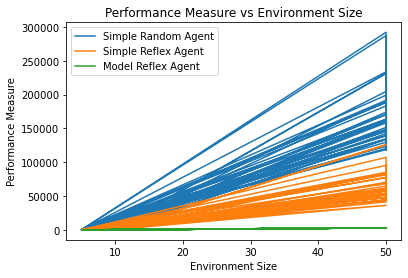

In [17]:
import matplotlib.pyplot as plt

simple_random_transposed = np.array(simple_random).T
simple_reflex_transposed = np.array(simple_reflex).T
model_reflex_transposed = np.array(model_reflex).T

plt.title("Performance Measure vs Environment Size")
plt.ylabel('Performance Measure')
plt.xlabel('Environment Size')
x, y_simple = simple_random_transposed
x1, y_reflex = simple_reflex_transposed
x2, y_model = model_reflex_transposed

plt.plot(x, y_simple, label='Simple Random Agent')
plt.plot(x1, y_reflex, label='Simple Reflex Agent')
plt.plot(x2, y_model, label= "Model Reflex Agent")
plt.legend()

### Plotting at the Average Performance Measure

I plotted the average of each performance measure by its environment size to get an idea of how each agent performs on average. The relationship noted above about how simple random is the least efficient, simple reflex the second least efficient, and model-based reflex agent being the most efficient prove to be true.

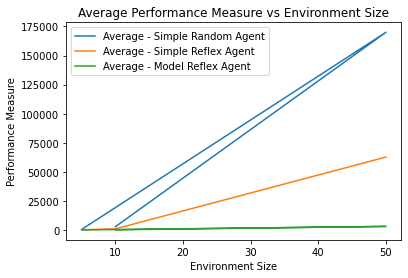

In [18]:
simple_random_transposed = np.array(sim_rand_avg).T
simple_reflex_transposed = np.array(sim_refl_avg).T
model_reflex_transposed = np.array(mod_refl_avg).T

x, y_simple = simple_random_transposed
x1, y_reflex = simple_reflex_transposed
x2, y_model = model_reflex_transposed

plt.title("Average Performance Measure vs Environment Size")
plt.ylabel('Performance Measure')
plt.xlabel('Environment Size')
plt.plot(x, y_simple, label='Average - Simple Random Agent')
plt.plot(x1, y_reflex, label='Average - Simple Reflex Agent')
plt.plot(x2, y_model, label= "Average - Model Reflex Agent")
plt.legend()

## Task 5: Robustness of the agent implementations [10 Points] 

Describe how **your agent implementations** will perform 

* if it is put into a rectangular room with unknown size, 
* if the cleaning area can have an iregular shape (e.g., a hallway connecting two rooms), or 
* if the room contains obstacles (i.e., squares that it cannot pass through and trigger the bumper sensors).


### Rectangular Room of Unknown Size
If my agents were placed in a rectangular room with an unknown size, they should still perform will because of the environmental constraints I created. Instead of creating the environment as just one nxn room, I made it to where the x-dimension had its own n size (nx) and the y-dimension also has its own n size (ny). The bumper sensors and everything should react accordingly.

### Irregular Cleaning Area
If the cleaning area has an irregular shape, the agents should still clean relatively well. However, in the scenario of a hallway connecting two rooms, I could foresee the Model-Based Reflex Agent only cleaning one half of one room and one half of the other since it makes the assumption that it is cleaning a singular room and it moves in a snake pattern to clean. So it would clean one half of the first room, go through the hallway, and clean the second half of the second room. The other agents are relatively random, so I could see it cleaning both rooms, but taking forever to do so.

### A Room with Obstacles
The agents I created do not have the functionality to avoid obstacles. However, if I was to create that sort of an implementation, I would most likely create a tuple array for each square where you can see whether its clean and whether there is some sort of object there (also a boolean). If there is an object there, then the agent would then avoid running over that square and it will move around it.